<a href="https://colab.research.google.com/github/MaksymMohylnyk/IAD/blob/main/PR%E2%84%961_Mohylnyk_M_R__PDM_51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практична №1. Кластеризація
Могильник Максим ПДМ-51

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/PR1_Clustering
!pip install --upgrade scikit-learn
!pip install yfinance --quiet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
company_symbol_mapping.json  data_clustering.txt


LR_4_task_1.0.py

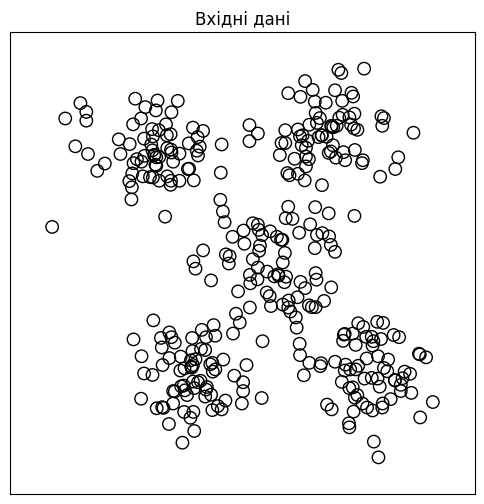

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Завантаження даних
data_path = '/content/drive/MyDrive/PR1_Clustering/data_clustering.txt'
X = np.loadtxt(data_path, delimiter=',')

# 2) Візуалізація вхідних даних
plt.figure(figsize=(6,6))
plt.scatter(
    X[:,0], X[:,1],
    marker='o',
    facecolors='none',
    edgecolors='black',
    s=80
)
plt.title('Вхідні дані')
# Розширимо трохи межі для краси
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# Приберемо поділки, як у методичці
plt.xticks([])
plt.yticks([])

# 3) Збереження рисунка для звіту
plt.savefig('task1_input.png', dpi=300)
plt.show()

LR_4_task_1.py

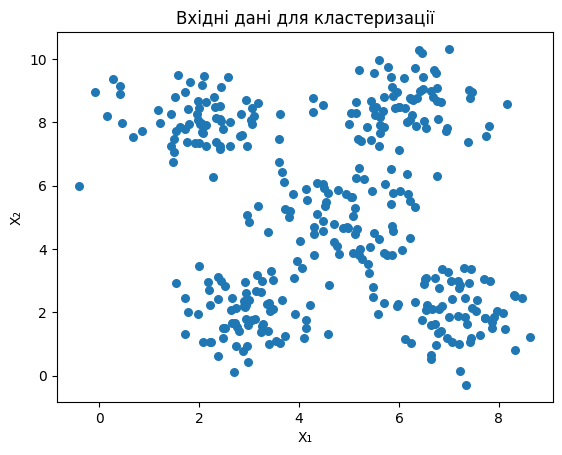

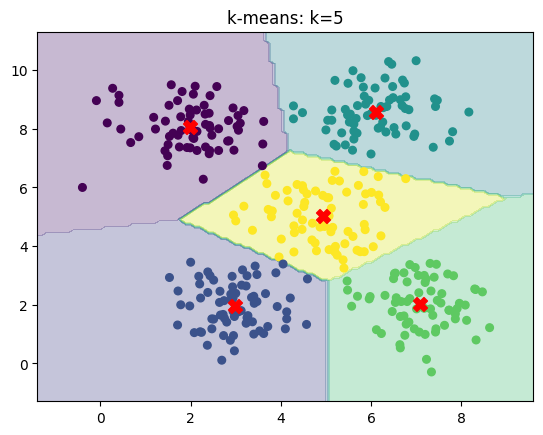

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1) Завантаження даних
data_path = '/content/drive/MyDrive/PR1_Clustering/data_clustering.txt'
X = np.loadtxt(data_path, delimiter=',')

# 2) Візуалізація початкових точок
plt.scatter(X[:,0], X[:,1], s=30)
plt.title('Вхідні дані для кластеризації')
plt.xlabel('X₁')
plt.ylabel('X₂')
plt.show()

# 3) Навчання k-means
k = 5
model = KMeans(n_clusters=k, init='k-means++', random_state=42)
labels = model.fit_predict(X)
centers = model.cluster_centers_

# 4) Межі кластерів
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=labels, s=30)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, marker='X')
plt.title(f'k-means: k={k}')
plt.show()

LR_4_task_2.py

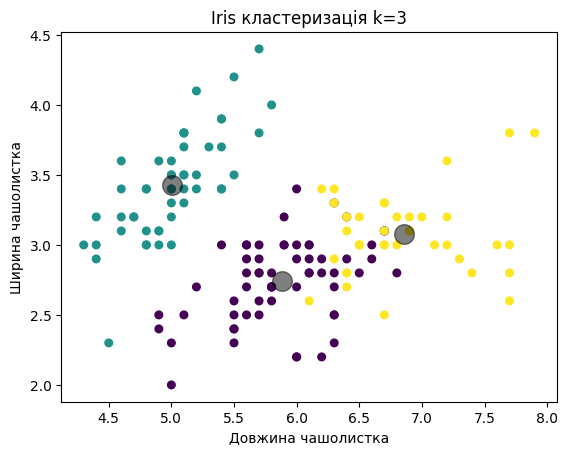

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X_iris = iris.data

# Навчання
model_iris = KMeans(n_clusters=3, init='k-means++', random_state=0)
labels_iris = model_iris.fit_predict(X_iris)
centers_iris = model_iris.cluster_centers_

# Візуалізація двох перших ознак
plt.scatter(X_iris[:,0], X_iris[:,1], c=labels_iris, s=30)
plt.scatter(centers_iris[:,0], centers_iris[:,1],
            c='black', s=200, alpha=0.5)
plt.xlabel('Довжина чашолистка')
plt.ylabel('Ширина чашолистка')
plt.title('Iris кластеризація k=3')
plt.show()

LR_4_task_3.py

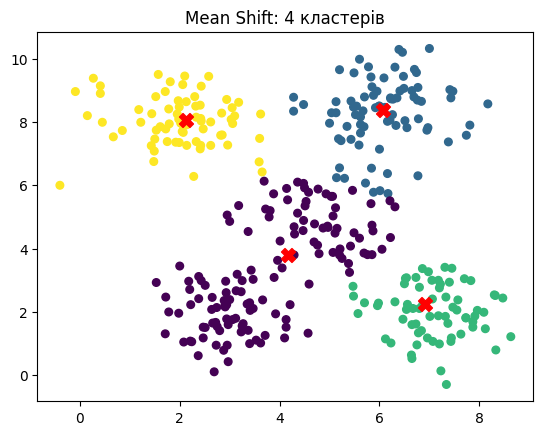

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import matplotlib.pyplot as plt

# Повторне завантаження даних
X = np.loadtxt('/content/drive/MyDrive/PR1_Clustering/data_clustering.txt', delimiter=',')

# Оцінка bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Навчання MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels_ms = ms.fit_predict(X)
centers_ms = ms.cluster_centers_

# Візуалізація
plt.scatter(X[:,0], X[:,1], c=labels_ms, s=30)
plt.scatter(centers_ms[:,0], centers_ms[:,1],
            c='red', s=100, marker='X')
plt.title(f'Mean Shift: {len(np.unique(labels_ms))} кластерів')
plt.show()

LR_4_task_4.py

In [ ]:
import json
import yfinance as yf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation

# 1) Зчитати mapping
with open('/content/drive/MyDrive/PR1_Clustering/company_symbol_mapping.json') as f:
    symbol_map = json.load(f)

# 2) Завантажити котирування GOOG за останній рік
ticker = 'GOOG'
df = yf.download(ticker, period='1y', progress=False)
# Перевіримо, що є колонки Open та Close
print("Колонки завантажені:", df.columns.tolist())

# 3) Різниця Open – Close
diff = df['Open'].values - df['Close'].values
X_stock = diff.reshape(-1, 1)

# 4) Стандартизація
X_scaled = StandardScaler().fit_transform(X_stock)

# 5) Affinity Propagation
ap = AffinityPropagation(random_state=0)
labels_ap = ap.fit_predict(X_scaled)
centers_idx = ap.cluster_centers_indices_
n_clusters = len(centers_idx)

# 6) Вивід результатів
print(f'\nЗнайдено {n_clusters} кластерів:')
for idx in centers_idx:
    # для індексу 0 у JSON дасть "GOOG"
    print(f' – {symbol_map.get(str(idx), idx)} (рядок #{idx})')

# 7) (Додатково) Розміри кластерів
from collections import Counter
counts = Counter(labels_ap)
print("\nРозмір кластерів (label: кількість днів):")
for label, cnt in sorted(counts.items()):
    print(f'  {label}: {cnt}')

YF.download() has changed argument auto_adjust default to True
Колонки завантажені: [('Close', 'GOOG'), ('High', 'GOOG'), ('Low', 'GOOG'), ('Open', 'GOOG'), ('Volume', 'GOOG')]

Знайдено 113 кластерів:
 – 2 (рядок #2)
 – 4 (рядок #4)
 – 6 (рядок #6)
 – 8 (рядок #8)
 – 9 (рядок #9)
 – 12 (рядок #12)
 – 13 (рядок #13)
 – 16 (рядок #16)
 – 17 (рядок #17)
 – 19 (рядок #19)
 – 20 (рядок #20)
 – 21 (рядок #21)
 – 24 (рядок #24)
 – 28 (рядок #28)
 – 29 (рядок #29)
 – 31 (рядок #31)
 – 34 (рядок #34)
 – 36 (рядок #36)
 – 37 (рядок #37)
 – 42 (рядок #42)
 – 45 (рядок #45)
 – 47 (рядок #47)
 – 48 (рядок #48)
 – 49 (рядок #49)
 – 51 (рядок #51)
 – 52 (рядок #52)
 – 53 (рядок #53)
 – 55 (рядок #55)
 – 58 (рядок #58)
 – 59 (рядок #59)
 – 60 (рядок #60)
 – 61 (рядок #61)
 – 64 (рядок #64)
 – 65 (рядок #65)
 – 66 (рядок #66)
 – 68 (рядок #68)
 – 74 (рядок #74)
 – 76 (рядок #76)
 – 77 (рядок #77)
 – 81 (рядок #81)
 – 82 (рядок #82)
 – 86 (рядок #86)
 – 87 (рядок #87)
 – 88 (рядок #88)
 – 90 (рядок #90

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
